# Norman, OK Tornado Prevalence Over Time
---

As a lifelong Normanite, the prevailing intuition regarding tornados within the city has been that Norman is 'protected' by some undetermined force. I've heard people, including meteorological researchers, refer to this effect as a 'bubble' or 'shield'. Tornados have always seemed to pass either just South or just North of Norman. However, in recent years, this anecdotal intuition has been challenged by a seemingly uncharaceristic increase in tornadic activity in Norman. 

My intention in this notebook is to explore whether the frequency of tornados in Norman, OK has increased over time. Specifically, I am going to be looking at the change in frequency of tornados since 2000. Let's take a look at the data and see what we can learn about this phenomenon. 

**The Data**: 
I will be using data regarding tornadic activity in the United States provided by the **NOAA Storm Prediction Center** as well as Oklahoma map data provided by the **US Census Bureau**. 

- Tornado Data: https://www.spc.noaa.gov/gis/svrgis/
- Oklahom Map Data: https://www2.census.gov/geo/tiger/GENZ2018/shp/

*Note on map data: search page for **cb_2018_40_bg_500k** to find the exact file used in this notebook*

---

### Prep
To begin, we need to install some dependencies and import them. We will be using **Geopandas** and **MatPlotLib** in this analysis. I chose to use Geopandas because we will need to convert each dataset to the same Coordinate Reference System(CRS) in order to accurately project the data from one dataset onto the other. Geopandas is specifically designed for this type of data wrangling with the ```to_crs()``` function which we will be using here. 

Run each cell in sequential order by pressing ```Shift+Enter``` while the cell is selected.

In [2]:
%matplotlib inline

In [2]:
conda install geopandas

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [3]:
conda install -c conda-forge descartes 

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt
import geopandas

### Setup
Now, we can read the two datafiles using *geopandas* and convert the coordinate data to **EPSG:3395** for each. EPSG:3395 is a type of *Mercator* map projection used by Google and most other web-based mapping services. Converting both files to EPSG:3395 ensures that we can accurately project data from the tornado dataset onto the map shape file.

Let's create a Cleveland County map by selecting the area of the Oklahoma map which corresponds to Cleveland County's **FIPS** code: *027*.

We can also separate the Oklahoma tornado data from the ```tornado``` dataset which includes data for the entire US.

In [4]:
# read OK map shape file | convert to EPSG:3395 | separate Cleveland County
ok_map = geopandas.read_file('data/cb_2018_40_bg_500k.shp')
ok_map = ok_map.to_crs("EPSG:3395")
clev_county = ok_map[ok_map['COUNTYFP'] == '027']

# read Tornado Data file | convert to EPSG:3395 | separate OK data
tornados = geopandas.read_file('data/1950-2021-torn-initpoint')
tornados = tornados.to_crs("EPSG:3395")
ok_tors = tornados[(tornados['st'] == 'OK')]

### Visualization

Ok, we have our Oklahoma tornado data assigned to ```ok_tors```, Oklahoma map assigned to ```ok_map```, and Cleveland County map assigned to ```clev_county```.

Let's visualize these individual data files:

First, we'll create a ```year``` variable so that we can assess data from various years while only changing one line of code. We'll use this to create a subset of the ```ok_tors``` dataset, called ```ok_tors_year```, that corresponds to whatever year we set the ```year``` variable to.

Then, we create a plot using *matplotlib*. In this plot, we first project the ```ok_map```, then we project the ```clev_county``` map on top of that(the Green section), and finally the tornado data for whichever year we choose(Red Triangles). 

Go ahead and run the following cell to see the plot and explore the data by changing the ```year``` variable. You'll have to re-run the cell each time you change the year.

<AxesSubplot:>

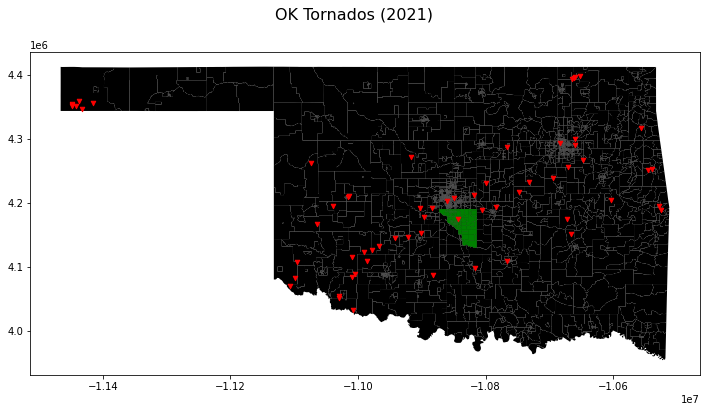

In [5]:
# Changeable Year Variable and Tornado Data by Year
year = 2021
ok_tors_year = tornados[(tornados['st'] == 'OK') & (tornados['yr'] == year)]

# Initialize the Plot
fig = plt.figure(1, figsize=(12,6))
ax = fig.add_subplot()
fig.suptitle(f'OK Tornados ({year})', fontsize=16)

# Plot ok_map then clev_county then ok_tors_year
ok_map.plot(ax=ax, color='black', linewidth=.8)
clev_county.plot(ax=ax, color='green')
ok_tors_year.plot(ax=ax, color='red', marker='v', markersize=20)

### Analysis

There's just something special about playing with data on a map, but now let's analyze this data to see if there is actually something going on around Norman.

To start, we'll look directly at the number of tornados that hit Norman each year. Then we'll zoom out to view data on Cleveland County, Oklahoma, and the US as a whole. 

The process for each of the following charts is pretty simple: we're going to create a copy of ```ok_tors```, specify the coordinate data of the area we are trying to look at, then generate a chart of the 15 most tornadic years since 1950 in that area. The chart will display the years with the most tornados on the left, descending toward the right.

<AxesSubplot:title={'center':'Norman Tornados by Year'}, xlabel='Year', ylabel='Number of Tornados'>

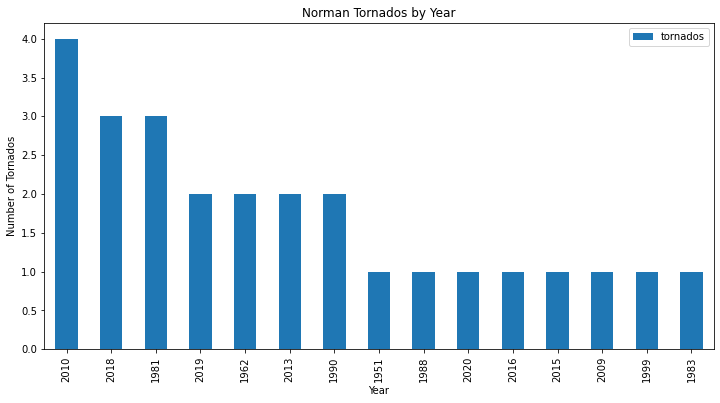

In [24]:
# Norman Tornados by Year
norman_by_year = ok_tors.copy()
norman_by_year = norman_by_year[(ok_tors['slat'] <= 35.32) & 
                                (ok_tors['slat'] >= 35.15) & 
                                (ok_tors['slon'] <= -97.17) & 
                                (ok_tors['slon'] >= -97.50) ]

norman_by_year['tornados'] = 1
norman_by_year = norman_by_year[['yr', 'tornados']].groupby('yr').count()
norman_by_year = norman_by_year.sort_values('tornados', ascending=False)[:15]
norman_by_year.plot.bar(figsize=(12,6), 
                        title  ='Norman Tornados by Year', 
                        ylabel ='Number of Tornados', 
                        xlabel ='Year')

<AxesSubplot:title={'center':'Cleveland County Tornados by Year'}, xlabel='Year', ylabel='Number of Tornados'>

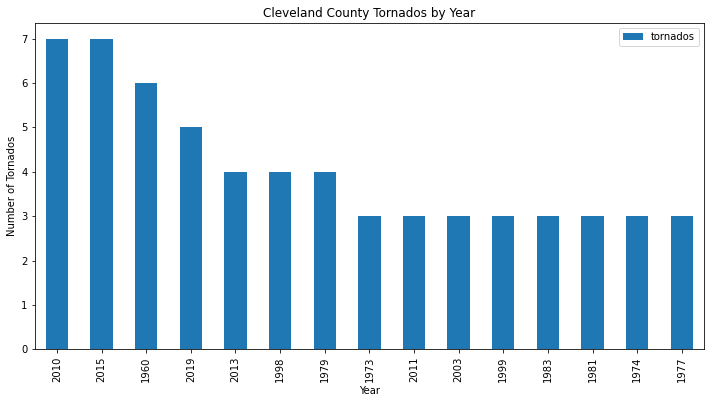

In [25]:
# Cleveland County Tornados by Year
cc_by_year = ok_tors.copy()
cc_by_year = cc_by_year[(ok_tors['slat'] >= 35.00) & 
                        (ok_tors['slat'] <= 35.38) & 
                        (ok_tors['slon'] <= -97.14) & 
                        (ok_tors['slon'] >= -97.70) ]
cc_by_year['tornados'] = 1

cc_by_year = cc_by_year[['yr', 'tornados']].groupby('yr').count()
cc_by_year = cc_by_year.sort_values('tornados', ascending=False)[:15]
cc_by_year.plot.bar(figsize=(12,6), 
                    title  ='Cleveland County Tornados by Year', 
                    ylabel ='Number of Tornados', 
                    xlabel ='Year')

<AxesSubplot:title={'center':'Oklahoma Tornados by Year'}, xlabel='Year', ylabel='Number of Tornados'>

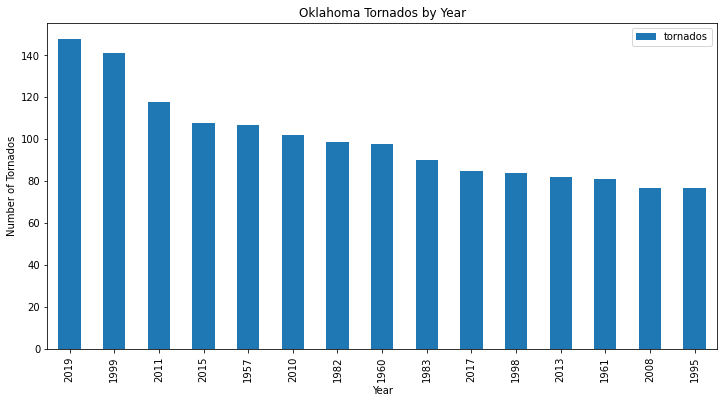

In [26]:
# Oklahoma Tornados by Year
ok_by_year = ok_tors.copy()
ok_by_year['tornados'] = 1

ok_by_year = ok_by_year[['yr', 'tornados']].groupby('yr').count()
ok_by_year = ok_by_year.sort_values('tornados', ascending=False)[:15]
ok_by_year.plot.bar(figsize=(12,6), 
                    title  ='Oklahoma Tornados by Year', 
                    ylabel ='Number of Tornados', 
                    xlabel ='Year')

<AxesSubplot:title={'center':'US Tornados by Year'}, xlabel='Year', ylabel='Number of Tornados'>

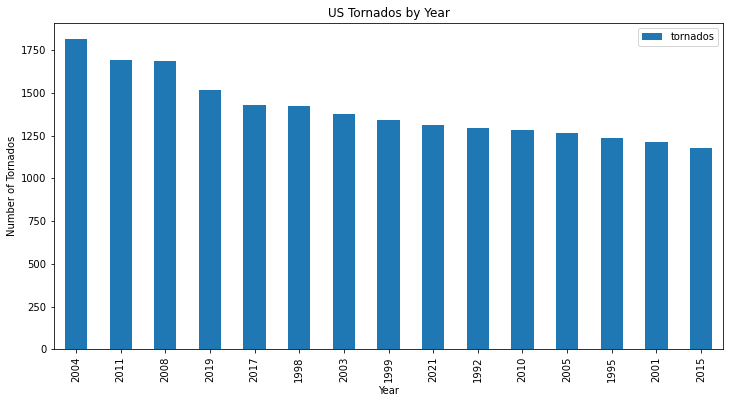

In [27]:
# US Tornados by Year
us_by_year = tornados.copy()
us_by_year['tornados'] = 1

us_by_year = us_by_year[['yr', 'tornados']].groupby('yr').count()
us_by_year = us_by_year.sort_values('tornados', ascending=False)[:15]
us_by_year.plot.bar(figsize=(12,6), 
                    title  ='US Tornados by Year', 
                    ylabel ='Number of Tornados', 
                    xlabel ='Year')

### Conclusion